# Applying ROE analysis to companies
## using conda packages and yahoo finance

In [17]:
# Date
from datetime import date

#Data Manipulation
import pandas as pd
import numpy as np
from pandas import DataFrame

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

# API
import yfinance as yf
import yahoo_fin.stock_info as si

### Set the variable to a company that you wish to analyze

In [18]:
company = "GOOG"

### Get basic stats before roe analysis

In [19]:
valuation = si.get_stats_valuation(company).iloc[:,:2]
valuation

,0,1
0,Market Cap (intraday) 5,1.6T
1,Enterprise Value 3,1.51T
2,Trailing P/E,32.14
3,Forward P/E 1,25.39
4,PEG Ratio (5 yr expected) 1,1.27
5,Price/Sales (ttm),8.12
6,Price/Book (mrq),7.04
7,Enterprise Value/Revenue 3,7.67
8,Enterprise Value/EBITDA 7,23.96


### Get all three kinds of financial statements

In [20]:
CF = si.get_cash_flow(company).transpose()
BS = si.get_balance_sheet(company).transpose()
IS = si.get_income_statement(company).transpose()
CF.info()
BS.info()
IS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2020-12-31 to 2017-12-31
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   investments                            4 non-null      int64
 1   changeToLiabilities                    4 non-null      int64
 2   totalCashflowsFromInvestingActivities  4 non-null      int64
 3   netBorrowings                          4 non-null      int64
 4   totalCashFromFinancingActivities       4 non-null      int64
 5   changeToOperatingActivities            4 non-null      int64
 6   netIncome                              4 non-null      int64
 7   changeInCash                           4 non-null      int64
 8   repurchaseOfStock                      4 non-null      int64
 9   effectOfExchangeRate                   4 non-null      int64
 10  totalCashFromOperatingActivities       4 non-null      int64
 11  depreciation   

### Numbers related to profitability

In [21]:
Profitability = pd.DataFrame()
Profitability["Gross_Profit_Margin"] = (IS["grossProfit"]/IS["totalRevenue"])
Profitability["Net_Profit_Margin"] = (IS["netIncome"]/IS["totalRevenue"])
Profitability["Operating_Profit_Margin"] = (IS["operatingIncome"]/IS["totalRevenue"])
Profitability["Operating_ROA"] = (IS["operatingIncome"]/BS["totalAssets"])
Profitability["ROA"] = (IS["netIncome"]/BS["totalAssets"])
Profitability["ROE"] = (IS["netIncome"]/BS["totalStockholderEquity"])

Profitability

,Gross_Profit_Margin,Net_Profit_Margin,Operating_Profit_Margin,Operating_ROA,ROA,ROE
endDate,,,,,,
2020-12-31,0.535784,0.220619,0.225852,0.12898,0.125992,0.180948
2019-12-31,0.555805,0.212181,0.225396,0.132225,0.124472,0.170486
2018-12-31,0.564761,0.224647,0.238234,0.140018,0.132032,0.173036
2017-12-31,0.588805,0.114221,0.260827,0.146552,0.064178,0.083028


## Dupont analysis of the company
### ROE = NetIncome / Equity = Net_Profit_Margin x Asset Turnover x Leverage

In [22]:
Dupont = pd.DataFrame()
Dupont["ROE"] = (IS["netIncome"]/BS["totalStockholderEquity"])
Dupont["Net_Profit_Margin"] = (IS["netIncome"]/IS["totalRevenue"])
Dupont["Total Asset Turnover"] = (IS["totalRevenue"]/BS["totalAssets"])
Dupont["Leverage"] = (BS["totalAssets"]/BS["totalStockholderEquity"])
Dupont['date'] = pd.date_range(start='12/31/2017', periods=len(Dupont), freq='Y')[::-1]
Dupont['ROE_Test'] = Dupont['Total Asset Turnover'] * Dupont['Net_Profit_Margin'] * Dupont['Leverage']
Dupont

,ROE,Net_Profit_Margin,Total Asset Turnover,Leverage,date,ROE_Test
endDate,,,,,,
2020-12-31,0.180948,0.220619,0.571082,1.436192,2020-12-31,0.180948
2019-12-31,0.170486,0.212181,0.586632,1.369670,2019-12-31,0.170486
2018-12-31,0.173036,0.224647,0.587731,1.310559,2018-12-31,0.173036
2017-12-31,0.083028,0.114221,0.561874,1.293721,2017-12-31,0.083028


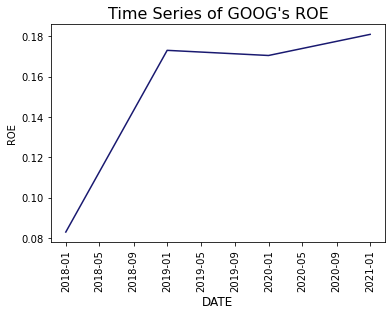

In [23]:
plt.plot(Dupont['date'], Dupont['ROE'], label='ROE', color= "midnightblue")
plt.xticks(rotation=90)

plt.xlabel("DATE", fontsize = "12")
plt.ylabel("ROE")
plt.title(f"Time Series of {company}'s ROE", fontsize = "16")
plt.show()

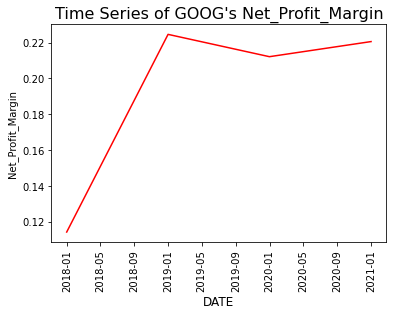

In [24]:
plt.plot(Dupont['date'], Dupont['Net_Profit_Margin'], label='Net_Profit_Margin', color= "red")
plt.xticks(rotation=90)

plt.xlabel("DATE", fontsize = "12")
plt.ylabel("Net_Profit_Margin")
plt.title(f"Time Series of {company}'s Net_Profit_Margin", fontsize = "16")
plt.show()

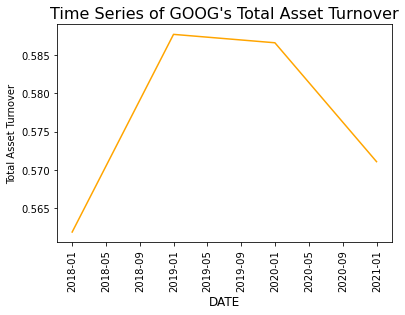

In [25]:
plt.plot(Dupont['date'], Dupont['Total Asset Turnover'], label='Total Asset Turnover', color= "orange")
plt.xticks(rotation=90)

plt.xlabel("DATE", fontsize = "12")
plt.ylabel("Total Asset Turnover")
plt.title(f"Time Series of {company}'s Total Asset Turnover", fontsize = "16")
plt.show()

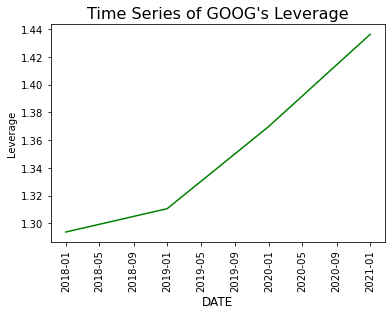

In [26]:
plt.plot(Dupont['date'], Dupont['Leverage'], label='Leverage', color= "green")
plt.xticks(rotation=90)

plt.xlabel("DATE", fontsize = "12")
plt.ylabel("Leverage")
plt.title(f"Time Series of {company}'s Leverage", fontsize = "16")
plt.show()